<a href="https://colab.research.google.com/github/OIEIEIO/supreme-octo-chainsaw/blob/main/Copy_of_Zoetrope_5_5_OIEIEIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# License
Copyright (c) 2021 Bearsharktopusdev

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# How do I use this?

First, type in your description(s) where it says *A beautiful brutalist Waluigi* or upload image(s) and enter their path. You can add multiple text and image paths, and/or you can leave them blank. 

Next, decide how much weight you want each text and image to have on the output by adjusting the `w` variables -- it is suggested that you set at least one weight to 1.

Finally, click **Runtime** up in the top menu and choose **Restart and Run All**, then wait as each sequential play button circles around.

Your output will appear at the bottom of this page near the **Output** heading as it processes after a short while. Scroll down below everything else to see new images appear. 

The images will start by looking like dirt, but the page will eventually ding and show new images as it begins to attempt to match the image to your inputs.

---

## What's new between Zoetrope 5 and Zoetrope 5.5?
The project has taken on a new assistant - Dekxi! Their help has been instrumental in getting post-processing up and running, and will be similarly helpful for the upcoming camera zoom/pan/rotate (general affine transformation) features. A couple more minor features, tweaks, and general codebase changes have been made. This thing is sort of beginning to spiral out of control, so I'm going to spend some time after 6.0 trying to clean it up so we don't accumulate too much code debt.
<br><br>

__New major feature__: Postprocessing options<br>
__New major feature__: CLIP and VQGAN models both separately selectable (under Generation Options)<br>
_New minor feature_: Improved model downloading pipeline<br>
_New minor feature_: Changed every mention of `/content/` to `default_path` - should make life easier for people looking to run locally.
<br><br>

If you'd like to help fund further development of Zoetrope (I would **love** to make this my day job), you can contribute to my [Patreon](https://www.patreon.com/bearsharktopus) (alt link: https://www.patreon.com/bearsharktopus) for access to newer versions faster at $5 and above, or purchase some of my art on my [Redbubble store](http://bearsharktopus.redbubble.com/) (alt link: http://bearsharktopus.redbubble.com/). Any financial assistance is greatly appreciated.<br><br>

Also, feel free to join the [Official Zoetrope Discord](https://discord.gg/QPxEB8fcrh), located at https://discord.gg/QPxEB8fcrh!


# Params

Fill in the texts and image paths.

**To upload images, just click this button: 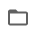 then drag them into the left pane.
Images default to being uploaded to `/content/<image_name.png>`. ***


In [ ]:
#@markdown Input your text prompt here and assign it a weight. text_input and text_to_add are two separate prompts with separate weights (w0 and w1).
text_input = "a faster than light spacecraft" #@param {type:"string"}
w0 = 0.4 #@param {type:"slider", min:-5, max:5, step:0.1}
text_to_add = "" #@param {type:"string"}
w1 = 0.3 #@param {type:"slider", min:-5, max:5, step:0.1}

# init_image = False #@param {type:"boolean"}
#@markdown Enter a comma-space (", ") separated list of image locations as "image.jpg, image2.jpg, image3.jpg" to use image-based prompting
img_enc_path = "" #@param {type:"string"}
w2 = 0.2 #@param {type:"slider", min:-5, max:5, step:0.1}
img_mode = 'Average'
random_list_encode = 0
ne_img_enc_path = "" #@param {type:"string"}
w3 = 0.1 #@param {type:"slider", min:-5, max:5, step:0.1}
ne_img_mode = 'Average'
ne_random_list_encode =  0
#@markdown Enter up to two gifs/mp4s if desired, in each path
gif_img_enc_path = "" #@param {type:"string"}
w4 = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
gif2_img_enc_path = "" #@param {type:"string"}
w5 = 0 #@param {type:"slider", min:-5, max:5, step:0.1}

#@markdown #Startup Options
#@markdown Leave init_image_path blank to generate from noise.
default_path = '/content/'
init_image_path = '' #@param {type:"string"}
init_image_path = default_path + init_image_path

init_type = "perlin" #@param ["image", "blocky", "perlin", "constant", "default"] {type:"string"}
if len(init_image_path) > len(default_path):
  init_type = "image"


#@markdown #Image Options
size_preset = 'Medium Square' #@param ["N/A", "Medium Square", "Large Square", "Small Square", "Large 16:9", "Small 16:9", "Large 8:9", "Small 8:9", "Large 4:3", "Small 4:3", "MTG Card Art", "Perceptor Size"] {type:"string"}
sideX =  384#@param {type:"integer", min: 224, max:2048, step:1}
sideY =  682#@param {type:"integer", min: 224, max:2048, step:1}

channels = 3

if size_preset == 'Medium Square':
  sideX = 512
  sideY = 512
elif size_preset == 'Large Square':
  sideX = 768
  sideY = 768
elif size_preset == 'Small Square':
  sideX = 256
  sideY = 256
elif size_preset == 'Large 16:9':
  sideX = 576
  sideY = 1024
elif size_preset == 'Small 16:9':
  sideX = 288
  sideY = 512
elif size_preset == 'Large 8:9':
  sideX = 720
  sideY = 640
elif size_preset == 'Small 8:9':
  sideX = 360
  sideY = 320
elif size_preset == 'Large 4:3':
  sideX = 672
  sideY = 896
elif size_preset == 'Small 4:3':
  sideX = 336
  sideY = 448
elif size_preset == 'MTG Card Art':
  sideX = 624
  sideY = 848
elif size_preset == 'Perceptor Size':
  sideX = perceptor_size
  sideY = perceptor_size
else:
  im_shape = [512, 512, 3]

im_shape = [sideX, sideY, channels]

batch_size = 1

#@markdown #Generation Options:
#@markdown Defaults are ViT-B/32 and imagenet_16384.
clip_model = "ViT-B/32" #@param ['RN50', 'RN101', 'RN50x4', 'RN50x16', 'ViT-B/32','ViT-B/16']
vqgan_model = "imagenet_16384" #@param ['imagenet_16384', 'imagenet_1024', 'openimages_8192', 'coco', 'faceshq', 'wikiart_1024', 'wikiart_16384', 'sflckr', 'gumbel']

learning_epochs = 1#@param {type: "integer"}
save_rate =  100#@param {type:"integer"}
display_rate =  100#@param {type:"integer"}
single_display = False #@param {type:"boolean"}
auto_video = False #@param {type:"boolean"}
out_folder = 'l25v_output' #@param{type:"string"}
# If you need to create the folder:

#@markdown #Augmentation Options:
#@markdown Augmentations Per Iteration. Turn this down if you're running out of memory.
cutN =   32#@param {type:"integer", min: 1}

# Postprocessing

In [ ]:
#The following is a list of postprocessing options available to the end user.

#Postprocessing List
# The below list applies each postprocessing feature in the order that they are 
# listed to any image output.
# Example: postprocessing_list = ["saturation", "contrast", "brightness"]
# Saturation is run first, followed by contrast, followed by brightness
postprocessing_list = [""]

#Palettize ("palettize")
# Squishes all the color down in the image into the applied palette or palette preset.
# Palette data must be in a specific format - a list of integers, in groups of three (RGB values), that are an exponent of 2
# 2, 4, 8, 16, etc. You can use duplicates to achieve non-exponent-of-2 numbers of colors [0,0,0, 0,0,0, 128,128,128, 255,255,255]
palette = [0,0,0, 255,0,0, 0,255,0, 0,0,255, 0,255,255, 255,0,255, 255,255,0, 255,255,255] #RGB + CMY + Black/White
palettize_dithering = True
#TODO
#palette_preset = None # ["gameboy classic", "gameboy advance", "nes", "RGB+Black/White", "CYMK", "RGB+CMY+Black/White"]

#Quantize ("quantize")
# Like a more automated Palettize. Squishes down an image's colors into only a certain amount.
quantize_number = 64
quantize_dithering = True

#Pixelate ("pixelate")
# Shrinks an image and then upscales it back up in order to pixelate it.
# Works best with square images and with exponents of two. May break on weird resolutions
pixelate_factor = 4 #[2, 4, 8, 16, 32]

#Brightness ("brightness")
# Alters an image's darkness/brightness level. 
# Numbers between 0 and 1 darken, numbers above 1 brighten.
brightness_factor = 1.0

#Contrast ("contrast")
# Alters an image's contrast level. 
# Numbers between 0 and 1 decrease contrast, numbers above 1 increase contrast.
contrast_factor = 1.0

#Saturation ("saturation")
# Alters an image's saturation level (colorfulness)
# Numbers between 0 and 1 decrease saturation, numbers above 1 increase saturation.
saturation_factor = 1.0

#Sharpness ("sharpness")
# Alters an image's sharpness level. 
# Numbers between 0 and 1 decrease sharpness, numbers above 1 increase sharpness.
sharpness_factor = 1.0

#Box Blur ("box_blur")
# Blurs an image using a square box of radius n pixels to generate an average value
box_blur_radius = 0.0

#Invert ("invert")
# Inverts an images colors.
# No parameters.

#Grayscale ("grayscale")
# Turns an image greyscale.
# No parameters.

#Mirror ("mirror")
# Mirrors an image horizontally. Not sure why you want to use this, but okay.
# No parameters.

#Flip ("flip")
# Flips an image vertically.
# No parameters.



#TODOS
#These are nonfunctional.

#Gamma
# Applies gamma correction to the image
# TODO: This is not functional, requires opencv->PIL passing back and forth.

#Sepia
# Applies a sepia filter to the image
# TODO: Requires writing some definition stuff. See: https://www.yabirgb.com/sepia_filter/

# Advanced Params

In [ ]:
#@markdown **Initialization Options**
extra_fuzz_strength = 0.6 #@param {type:"slider", min:0, max:1, step:0.01}
grayscale_fuzz = True #@param {type:"boolean"}
init_val = 0.5 #@param {type:"slider", min:0, max:1, step:0.01}
# These alter the starting noise generated for your prompt.
# They are overridden if init_image is checked.
# blocky_random = False # default False
grayscale_random = False #@param {type:"boolean"}
random_size = 2048 #@param {type:"slider", min:2, max:2048, step:1}
perlin_scale = 1 #@param {type:"slider", min:0.1, max:100, step:0.1}
perlin_strength = 0.5 #@param {type:"slider", min:0, max:2, step:0.01}
#How many octaves to use?
perlin_octaves =  8#@param {type:"integer", min: 1}
# How much to decay each octave? (higher = more high freq noise)
perlin_persistence = 0.65 #@param {type:"slider", min:0.1, max:2, step:0.1}
#How mucch to scale each octave
perlin_lacunarity = 2  #@param {type:"slider", min:0.1, max:5, step:0.1}

#@markdown **Learning Schedule**
learning_rate =  0.30#@param {type:"number"}
min_learning_rate =  0.15#@param {type:"number"}
learning_method = "BOIL" #@param ["DEFAULT", "BOIL", "SEAR", "RANDOM"] {type:"string"}
decay =  0.1#@param {type:"number"}
epsilon =  0#@param {type:"number"}
optimizer_type = "AdamW" #@param ["AdamW", "Ranger21", "AccSGD","AdaBound","AdaMod","Adafactor","AdamP","AggMo","DiffGrad","Lamb","NovoGrad","PID","QHAdam","QHM","RAdam","SGDP","SGDW","Shampoo","SWATS","Yogi"] {type:"string"}
#@markdown Use Lookahead will enable an additional optimizer that attempts to "look ahead" for further image optimization.
use_lookahead = True #@param {type:"boolean"}
#@markdown **Output Options**<br>
#@markdown learning_epochs is the number of times the training loop runs for total_iterations steps. After that many steps, it will reset itself and begin generating from scratch again.
total_iterations =  400#@param {type:"integer"}

#@markdown Random rotation degrees
deg = 12 #@param {type:"slider", min:0, max:90, step:1}
#@markdown Mirroring Probabilities
horizontal = 0.1 #@param {type:"slider", min:0.0, max:0.5,step:0.01}
vertical = 0.02 #@param {type:"slider", min:0.0, max:0.5,step:0.01}
#@markdown Augmentation Noise
random_noise = 0 #@param {type:"slider", min:0.0, max:5, step:0.01}
random_erasing = 0 #@param {type:"slider", min:0.0, max:1, step:0.01}
blur_probability = 0.1 #@param {type:"slider", min:0.0, max:1, step:0.01}
#@markdown Sharpness filter settings (experimental)
sharpen_pre_augment = False #@param {type:"boolean"}
sharpen_post_augment = False #@param {type:"boolean"}
sharpen_every =   1#@param {type:"integer", min: 0}
#@markdown Latent vector augmentation settings (experimental)
lats_nonlinearity = "tanh" #@param ["clip", "tanh", "none"] {type:"string"}
lats_noise =  0 #@param {type:"slider", min:0.0, max:0.1, step:0.001}
lats_scale = 10 #@param {type:"slider", min:1, max:10, step:0.1}

optim_cfg = {
              "optimizer_type" : optimizer_type,
              "learning_rate" : learning_rate,
              "min_learning_rate" : min_learning_rate,
              "learning_method": learning_method,
              "decay" : decay,
              "iterations" : total_iterations,
              "model_type" : "VQGAN_16384", #for now this does nothing. TODO: Switch models somehow but keep the same image?
              "use_lookahead" : use_lookahead,
              "epsilon" : epsilon
}
optim_chain = [[optim_cfg]]


In [ ]:
#Advanced Feature: Music Enabling
# If you want to use Music Prompts, you have to enable them here
# It breaks if the git clone and python setup are in the same cell
# I don't know why
music_enabled = False
if music_enabled:
  !git clone https://github.com/jordipons/musicnn.git
  %cd musicnn
  !python setup.py install
  %cd ../

In [ ]:
#Advanced Text Prompts
# Every prefix, main prompt, and suffix is multiplied together.
# Example:
# prefixes = ["painting", "photograph"]
# prompt_main = ["of a forest"]
# suffixes = ["by zdzislaw beksinski", ""]
# final results are "painting of a forest by zdzislaw beksinski",
# "photograph of a forest by zdzislaw beksinski", "painting of a forest",
# and "photograph of a forest".
# Advanced text prompts are treated as if they have a weight of 1 for now.
advanced_text_enabled = False #Set to true if you want to use advanced text prompts
prefixes       = [""]
prompt_main    = [""]
infixes        = [""]
suffixes       = [""]
prompt = []
for i in range(len(prefixes)):
    for j in range(len(prompt_main)):
        for k in range(len(infixes)):
            for l in range(len(suffixes)):
              prompt_merge = prefixes[i] + " " + prompt_main[j] + " " + infixes[k] + " " + suffixes[l]
              prompt.append(prompt_merge)

#text_not
# text_not is a list of stuff that the system attempts to remove from your images
# The default list is '''incoherent, confusing, cropped, watermarks, text, writing'''
# Alter if desired!
text_not = '''incoherent, confusing, cropped, watermarks, text, writing'''

#Warmup & Boil Period
# Computes the required multiplier so that a warmup/boil learning rate reaches
# a rate of multiplying by (mult) every x steps. 
warmup_mult = 2 # 2 = Double the learning rate...
warmup_period = 300 # Every 200 steps.
warmup_amt = warmup_mult**(1/warmup_period)
boil_mult = 0.5 # 0.5 = Halve the learning rate...
boil_period = 100 # Every 100 steps.
boil_amt = boil_mult**(1/boil_period)
print(warmup_amt)
print(boil_amt)

#Blue Noise
# Blue Noise is a finer grain form of noise applied as an augmentation.
blue_noise_intensity = 0.05 # default 0.05
blue_noise_percentage = 0.1 # default 0.1

#Display Initial Image on New Epoch
# Does what it says it will do.
display_init_on_epoch = True

#
##
###
#Experimental Parameters - possibly buggy! Handle with care!
###
##
#

#Music Prompts
# Highly experimental feature!
# Generates a list of tags based on a provided MP3,
# appends them to the prefix, and then feeds them
# as a text-based prompt to the generator.
music_prompt = []
if music_enabled:
  music_title = 'mister brightside'
  music_artist = 'the killers'
  music_name = default_path + music_title + '.mp3' # Music File Goes Here

  import musicnn
  from musicnn import tagger
  m_taglist = musicnn.tagger.top_tags(music_name, model='MSD_musicnn_big', topN=3)
  m_taglist2 = musicnn.tagger.top_tags(music_name, model='MTT_musicnn', topN=3)
  m_taglist3 = musicnn.tagger.top_tags(music_name, model='MTT_vgg', topN=3)
  m_tags = []
  for i in m_taglist:
    for k in m_taglist3:
      temp = i + " " + k 
      m_tags.append(temp)
  for i in m_taglist2:
    for k in m_taglist3:
      temp = i + " " + k 
      m_tags.append(temp)

  print(m_tags)

  m_prefixes = ["album art for"]
  m_infixes = ["song titled " + music_title, music_title, "song named " + music_title, "music single named " + music_title]
  m_suffixes = ['']
  if music_artist != '':
    m_suffixes = ['', 'by ' + music_artist, 'performed by ' + music_artist]
  for i in range(len(m_prefixes)):
      for j in range(len(m_tags)):
          for l in range(len(m_infixes)):
            for k in range(len(m_suffixes)):
              prompt_merge = m_prefixes[i] + " " + m_tags[j] + " " + m_infixes[l] + " " + m_suffixes[k]
              music_prompt.append(prompt_merge)

#Scaler
# It's sort of like zooming out. Unpredictable effects. Play around with it!
# Warning: will fuck up human faces.
# Cannot be used with sharpening.
scaler = 1.0

#RHW Style Loss
# Uses a cosine similarity addition function inspired by RiversHaveWings's notebooks.
# Enhances the effects of images - an image's weight is functionally multiplied by 3-4,
# So be careful and adjust yoour weights accordingly.
rhw_style_loss = False

#Soft Histogram
# It makes a histogram of pixel data to arrange the image by. Play around with it!
use_softhistogram = False

#JPEG Vector
# Turn on to enable an experimental de-JPEG-noiseing feature.
use_jpeg_vector = False
if use_jpeg_vector:
  import base64
  jpeg_weight = 0.5 #Weight of de-JPEGing effect

#Chain & Parallel Optimization
# Chains together multiple optimizers, feeding the output of each into the next.
# Enabling this overrides the settings selected in the "params" section
# The optimizer chain is a list of lists.
# If chain_optim is true, it iterates through everything in the list-list one-by-one
# if parallel_optim is true, then it runs every optimizer in a single list at once,
# THEN moves onto the next element in the list-list.
# parallel_optim does nothing without chain_optim also being enabled.
chain_optim = True
if chain_optim:
    optim_chain = [
        [{
            "optimizer_type": "AdamW",
            "learning_rate": 0.02,
            "min_learning_rate": 0.01,
            "learning_method": "BOIL",
            "decay": 0.1,
            "iterations": 100,
            "model_type": "VQGAN_16384",
            "use_lookahead": False,
         },{
            "optimizer_type": "RAdam",
            "learning_rate": 0.01,
            "min_learning_rate": 0.005,
            "learning_method": "BOIL",
            "decay": 0.005,
            "iterations": 100,
            "model_type": "VQGAN_16384",
            "use_lookahead": False,
         }],
         [{
            "optimizer_type" : "Yogi",
            "learning_rate" : 15,
            "min_learning_rate" : 15,
            "learning_method": "DEFAULT",
            "decay" : 0,
            "epsilon" : 1e-6,
            "iterations" : 200,
            "model_type" : "VQGAN_16384", 
            "use_lookahead" : True
          }],
          [{
            "optimizer_type" : "RAdam",
            "learning_rate" : 8,
            "min_learning_rate" : 1,
            "learning_method": "BOIL",
            "decay" : 0.005,
            "epsilon" : 1e-6,
            "iterations" : 400,
            "model_type" : "VQGAN_16384",
            "use_lookahead" : True
          }],[{
            "optimizer_type" : "Yogi",
            "learning_rate" : 40,
            "min_learning_rate" : 20,
            "learning_method": "BOIL",
            "decay" : 0,
            "epsilon" : 1e-8,
            "iterations" : 100,
            "model_type" : "VQGAN_16384", 
            "use_lookahead" : False
          }]
    ]

#Encoder/Decoder Optimizer
# Optimizes the model rather than the image.
# Recommended settings are to run w/ DiffGrad and the default settings
# listed below. Run for as many iterations as you want, and then
# on checkout, it will transfer the model to the specified file.
vq_optim = False
vq_lr = 0.001
vq_dec = 0.0001

file_to_transfer = 'image.jpg' # .jpg, .gif, or .mp4s accepted
file_to_transfer = default_path + file_to_transfer

# Disables normal learning methods
if vq_optim:
  chain_optim = False
  for optim_cfg in optim_chain:
    optim_cfg['learning_rate'] = 0
    optim_cfg['min_learning_rate'] = 0
    optim_cfg['learning_method'] = "DEFAULT"
    optim_cfg['decay'] = 0
    optim_cfg['epsilon'] = 0

# GPU information

In [ ]:
# were you lucky today?
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-8f56e98b-85a9-607d-1a34-bbcfaf582ccb)


# Top (imports)


In [ ]:
!pip install kornia
!pip install --no-deps ftfy regex tqdm
!pip install einops
!pip install torch_optimizer==0.1.0
!pip install noise
# !pip install git+https://github.com/aleju/imgaug.git

import random
from datetime import datetime
from tqdm import tqdm
import torch
import torch_optimizer as optim
import numpy as np
import noise
# import imgaug
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import kornia
import PIL
from PIL import Image, ImageSequence, ImageOps, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os
import random
import imageio
from IPython import display
from base64 import b64encode
from google.colab import output

output.clear()

In [ ]:
!git clone https://github.com/openai/CLIP.git
from CLIP import clip

perceptor_size = 224 
if clip_model == 'RN50x4' or clip_model == 'RN50x16':
  perceptor_size = 288

perceptor, preprocess = clip.load(clip_model, jit=False)
_ = perceptor.eval().requires_grad_(False)

if clip_model == 'ViT-B/32' and scaler != 1:
  num = 1 + int(scaler*7)**2
  perceptor.visual.positional_embedding = torch.nn.Parameter(torch.nn.functional.upsample(perceptor.visual.positional_embedding.T.unsqueeze(0), (num), mode='linear', align_corners=True).squeeze(0).T)
  perceptor_size = int(perceptor_size * scaler)
elif clip_model == 'ViT-B/16' and scaler != 1:
  num = 1 + int(scaler*14)**2
  perceptor.visual.positional_embedding = torch.nn.Parameter(torch.nn.functional.upsample(perceptor.visual.positional_embedding.T.unsqueeze(0), (num), mode='linear', align_corners=True).squeeze(0).T)
  perceptor_size = int(perceptor_size * scaler)
else:
  scaler = 1

output.clear()

In [ ]:
!ls $default_path/models/

wikiart_16384.ckpt  wikiart_16384.yaml


# Generator

In [ ]:
!pip uninstall torchtext --yes
%cd $default_path
!git clone https://github.com/CompVis/taming-transformers  
%cd $default_path
%mkdir $default_path/models/
%cd $default_path/models/

#TODO: make it not curl things already downloaded
if vqgan_model == 'imagenet_1024' and not os.path.isfile('vqgan_imagenet_f16_1024.yaml'):
  !curl -L -o vqgan_imagenet_f16_1024.yaml -C - 'http://mirror.io.community/blob/vqgan/vqgan_imagenet_f16_1024.yaml' #ImageNet 1024
  !curl -L -o vqgan_imagenet_f16_1024.ckpt -C - 'http://mirror.io.community/blob/vqgan/vqgan_imagenet_f16_1024.ckpt'  #ImageNet 1024
elif vqgan_model == 'imagenet_16384' and not os.path.isfile('vqgan_imagenet_f16_16384.yaml'):
  !curl -L -o vqgan_imagenet_f16_16384.ckpt -C - 'https://heibox.uni-heidelberg.de/f/867b05fc8c4841768640/?dl=1'
  !curl -L -o vqgan_imagenet_f16_16384.yaml -C - 'https://heibox.uni-heidelberg.de/f/274fb24ed38341bfa753/?dl=1'
elif vqgan_model == 'openimages_8192' and not os.path.isfile('vqgan_openimages_f8_8192.yaml'):
  !curl -L -o vqgan_openimages_f8_8192.yaml -C - 'https://heibox.uni-heidelberg.de/d/2e5662443a6b4307b470/files/?p=%2Fconfigs%2Fmodel.yaml&dl=1' #OpenImages 8192
  !curl -L -o vqgan_openimages_f8_8192.ckpt -C - 'https://heibox.uni-heidelberg.de/d/2e5662443a6b4307b470/files/?p=%2Fckpts%2Flast.ckpt&dl=1' #OpenImages 8192
elif vqgan_model == 'coco' and not os.path.isfile('coco.yaml'):
  !curl -L -o coco.yaml -C - 'https://dl.nmkd.de/ai/clip/coco/coco.yaml' #COCO
  !curl -L -o coco.ckpt -C - 'https://dl.nmkd.de/ai/clip/coco/coco.ckpt' #COCO
elif vqgan_model == 'faceshq' and not os.path.isfile('faceshq.yaml'):
  !curl -L -o faceshq.yaml -C - 'https://drive.google.com/uc?export=download&id=1fHwGx_hnBtC8nsq7hesJvs-Klv-P0gzT' #FacesHQ
  !curl -L -o faceshq.ckpt -C - 'https://app.koofr.net/content/links/a04deec9-0c59-4673-8b37-3d696fe63a5d/files/get/last.ckpt?path=%2F2020-11-13T21-41-45_faceshq_transformer%2Fcheckpoints%2Flast.ckpt' #FacesHQ
elif vqgan_model == 'wikiart_1024' and not os.path.isfile('wikiart_1024.yaml'):
  !curl -L -o wikiart_1024.yaml -C - 'http://mirror.io.community/blob/vqgan/wikiart.yaml' #WikiArt 1024
  !curl -L -o wikiart_1024.ckpt -C - 'http://mirror.io.community/blob/vqgan/wikiart.ckpt' #WikiArt 1024
elif vqgan_model == 'wikiart_16384' and not os.path.isfile('wikiart_16384.yaml'):
  !curl -L -o wikiart_16384.ckpt -C - 'http://eaidata.bmk.sh/data/Wikiart_16384/wikiart_f16_16384_8145600.ckpt'
  !curl -L -o wikiart_16384.yaml -C - 'http://eaidata.bmk.sh/data/Wikiart_16384/wikiart_f16_16384_8145600.yaml'
elif vqgan_model == 'sflckr' and not os.path.isfile('sflckr.yaml'):
  !curl -L -o sflckr.yaml -C - 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fconfigs%2F2020-11-09T13-31-51-project.yaml&dl=1' #S-FLCKR
  !curl -L -o sflckr.ckpt -C - 'https://heibox.uni-heidelberg.de/d/73487ab6e5314cb5adba/files/?p=%2Fcheckpoints%2Flast.ckpt&dl=1' #S-FLCKR
elif vqgan_model == 'gumbel' and not os.path.isfile('gumbel.yaml'):
  !curl -L -o gumbel.yaml -c - 'https://heibox.uni-heidelberg.de/f/b24d14998a8d4f19a34f/?dl=1' #GUMBEL
  !curl -L -o gumbel.ckpt -C - 'https://heibox.uni-heidelberg.de/f/34a747d5765840b5a99d/?dl=1' #GUMBEL

%cd $default_path/taming-transformers/
%pip install omegaconf==2.0.0 pytorch-lightning==1.0.8
%pip install transformers
import yaml
import torch
from omegaconf import OmegaConf
from taming.models import vqgan, cond_transformer
from taming.models.vqgan import VQModel, GumbelVQ
from taming.models.cond_transformer import Net2NetTransformer

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if use_jpeg_vector:
    JPEG_Vector_Data = base64.b64decode("UEsDBAAACAgAAAAAAAAAAAAAAAAAAAAAAAAQABIAYXJjaGl2ZS9kYXRhLnBrbEZCDgBaWlpaWlpaWlpaWlpaWoACY3RvcmNoLl91dGlscwpfcmVidWlsZF90ZW5zb3JfdjIKcQAoKFgHAAAAc3RvcmFnZXEBY3RvcmNoCkZsb2F0U3RvcmFnZQpxAlgOAAAAOTQ3OTg1NDA5NDMzMTJxA1gDAAAAY3B1cQRNAAJ0cQVRSwBLAU0AAoZxBk0AAksBhnEHiWNjb2xsZWN0aW9ucwpPcmRlcmVkRGljdApxCClScQl0cQpScQsuUEsHCNwBHIqqAAAAqgAAAFBLAwQAAAgIAAAAAAAAAAAAAAAAAAAAAAAAGwANAGFyY2hpdmUvZGF0YS85NDc5ODU0MDk0MzMxMkZCCQBaWlpaWlpaWlpVa36+mrOXPN6xHzuRLPY93xHlPRg+ED5kL0Y+URqSPh7jTb7shh+9lquuPRaZjb2Z7LC9t1SZPVeM7T0tMxE+RiEFvxOJNby0yGw9IZBovZK/Gz4Cwh49V60mPlKXIb0qi1y8bwm5PWHCvr1sxqm9nI2Kvo33Pj12ARS+GkkWPvi9pL2qVYW9E5qhPl4IaD5aCEk7IJKSPWg24br9EMA97TxIPR7hIT07Ur27LDgLvtNQI73s73y+aJ7EvbHcr70ptBA+pgTcvDCIIj7fG9+9ZWz0PRY3jzso/Kw8CFWOPulTjT2elYg+aF3lvAEI1T07p/W9lIgvvnK+ML3BvAm919gavpik0byd5hI+H19hPX7rBz1H4gC67P8GPLvXRL0h76W9p1ePPY20gTz/b4U7DmqmPZOh+L0ii6w8hHQMvnP5ED46ZC++hZyZvXqGPj52fdK83HZjPexaOT6mvFW9FmYDPqRZc75CZIw9ZO1muxRcvr5Sfa09xkozvFY/fzyuGu895A8kPcS33z1diK+87adVvdcXjTqPzbc7C485PgOybb0X1K89HVjYvtreCrzndw88fyCivQBfIr7DnI+9RL+6vboIQr2v6Ee9f+sHvgH2Ubz7jXu8THOePlpWhDrYSRw9qYCzPlbvVD2NK9y8RxuTveR6vb2jvTe9ezIVPcuyVDx6EJy9F7o/PnrOjD02ENA9Ea3NPNq2I70fO7o9Wm6kvSR7S7xgeMw9X1Z5vY7q+70SqDU93yoaPstAdT0QrQi98ldtvos5+b0axcS9JVWPPcavr7ykNdm9g7AgvWOn773eO1q9DDYQPedOCb4UIR0+pfizvV4qRrzW8C89hqYTPbXZjjurKwK9VlP9PRfpGD1X8W6+LaINPpEHFD6Gpr+93CshvV5d9j2ckb08cQbmvZRVcD2FCFM9F86TvTivbr7NWGG9Mo3UvVZeI7zzBgo+hVdrvX8JtTxYwdM9XoCevBM8lD2qtNE8pOGivRC4k73WSAi98laaPZwEuD2ZLlo8mgbFPRnGq75I/fi9ejHCvUb0073vpis8tOTlvdbAMr1NExU+jeuKPHeOmzwXjkc+du7HPXMFRj11+fO9cQ0fPKZInz3mwmw9Lal4PlZyez3JFw4+pRr2PQIrLr5Ma1I+En+WvB/AxL2wVbu9kVymvhIvWz5Egx091mHJOi/sbz3wIh+91GNXvaxD1D0SV4S+sBAuvWqS870FRIe8CnEvPGI+HL3Ycfo8hJIhvaCTpT2ohZY8Hch/PuUYkz0/HkO9hHzJPEKCejynhcq8SH+Svbaklb0wXUI+MBcsPuMk8z3yfIq78L+gvRL0dL1olK+98Vx4veXBbL6A/rG9EDy1PbwgF77h9lK+9RxkPayKDj7w6M09J1Mgva20zL3IIz4+H1yRPBtbFr6gbyA+352fvWfNojzbXyC6D2QVPY9Ukz0Buyk99gf4PUHkL73PCWW9xgGlvDgFgrx59Qs9nMHvOr6pij2MM0Y8OjUiu5hLbT1WjxA9CUvyvg+zCT05UgU+UlcivvkeZL0+ZDS+w233PauYxbwDm/K9U+qCPS3w8T3jdvU9XnmVOaNxQD033Ug+9aHxPfsUy7vyg/u9m9n3PCM2hzzHhhm+zVezPHGiAD2Uwz89g8Lpvds2TT7sFNA8K5p/PNh0U7vVxxg+exSEvL7dSb2X+3692rWJPRuOyz07uBO+DC18vcrygLwHPNy9468svSLN7T3603Y9mHOtvT2cnD33Are9yrUjvgrtDr56NCq+1QMqvsU6WD5TmYY99lGnPWRCXj0NWcs9yVOnvduuIL4zTa89l7AQPWq2xL1nrio9SeiuO6ilmb1zrya8CukcvStyiL4neq29ZCiFvfqWIjx5xn49XJYmPnN4lz0x3RY9bPEGPo3rlTvj55O9Mrz/PdfEirtQScE9Idl7PsE1Gj7GKBK8Kp7gvcLSr715MG49YHvOPG9gtj0F1kY+UjHzvFbaHT7oW/k8MYk7PkrOHTz5Cwq+9OeQPYejor3hWjG+DxmJvUN1eL2MlmC99T4Svv6XG764Z94980Hkva3jKD4nLVo9Ai2rO6rSCbyYGke+l0PJvVOyw73DE8C8QYgpPs0d6708zpS8Ym5wPTMrOD71Lhy+LbxNO+iyVr6aKzw9lt62PC789Txdwz8+1y+hPCERbb0U7mM9y9nFvU6yCj03BOQ8veU+Pf56dz1NcR09Vm2+PTsZ7L01Kqm9/TvCPeKqSz7DS1G+1cFHPcu0Q7vlcYS+PFDTO17R7b6UuzI9qlSIvdtoHz6h1PC8SiDIvYaEpb2misO9YU+lPVhlXr3srIk9N8PgPGjQwzwBqFS+SCHcPcmWhz6msp697GpcvaJvkryTLO498k0zvbLsmDz6nfc8CmJDPiS5Uz6azCm9gmDyPRehrT1j9hW96bv+vfOPZzxfrxW9rdGSu+SHPLx7L0e+6Ma1veynIb0tAzG+xSETPfA2HL6yQw+++HVPvFzKND3yA8g9+iEZvfijq71/DqA8BfMJvgydGr45wKo9Iig8vq6W1D0jpRO94S2yvCWsmb3PTtY819GJvf6UNb5xkMS95Q0OPc1pIL6FuAu+C7ALPnqXoruEZU09UPkqvRf84r3EVSm8li/sPfRVGL0cTIM9rVRbvfyABbw/+Jw9ifiVu3QFir3Lbtm8qgFQPeq1qr263089VEclvW7HA75OwTi9o4wJvlBLBwgbGBE+AAgAAAAIAABQSwMEAAAICAAAAAAAAAAAAAAAAAAAAAAAAA8AQwBhcmNoaXZlL3ZlcnNpb25GQj8AWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaWlpaMwpQSwcI0Z5nVQIAAAACAAAAUEsBAgAAAAAICAAAAAAAANwBHIqqAAAAqgAAABAAAAAAAAAAAAAAAAAAAAAAAGFyY2hpdmUvZGF0YS5wa2xQSwECAAAAAAgIAAAAAAAAGxgRPgAIAAAACAAAGwAAAAAAAAAAAAAAAAD6AAAAYXJjaGl2ZS9kYXRhLzk0Nzk4NTQwOTQzMzEyUEsBAgAAAAAICAAAAAAAANGeZ1UCAAAAAgAAAA8AAAAAAAAAAAAAAAAAUAkAAGFyY2hpdmUvdmVyc2lvblBLBgYsAAAAAAAAAB4DLQAAAAAAAAAAAAMAAAAAAAAAAwAAAAAAAADEAAAAAAAAANIJAAAAAAAAUEsGBwAAAACWCgAAAAAAAAEAAABQSwUGAAAAAAMAAwDEAAAA0gkAAAAA")
    JPEG_Vector_File = open("JPEG_Vector.pt", "wb")
    JPEG_Vector_File.write(JPEG_Vector_Data)
    JPEG_Vector_File.close()
    JPEG_Vector = torch.load("JPEG_Vector.pt").cuda()

def load_vqgan_model(config_path, checkpoint_path):
    config = OmegaConf.load(config_path)
    if config.model.target == 'taming.models.vqgan.VQModel':
        model = vqgan.VQModel(**config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    elif config.model.target == 'taming.models.cond_transformer.Net2NetTransformer':
        parent_model = cond_transformer.Net2NetTransformer(**config.model.params)
        parent_model.eval().requires_grad_(False)
        parent_model.init_from_ckpt(checkpoint_path)
        model = parent_model.first_stage_model
    elif config.model.target == 'taming.models.vqgan.GumbelVQ':
        model = vqgan.GumbelVQ(**config.model.params)
        model.eval().requires_grad_(False)
        model.init_from_ckpt(checkpoint_path)
    else:
        raise ValueError(f'unknown model type: {config.model.target}')
    del model.loss
    return model

if vqgan_model == 'imagenet_1024':
  vqgan_model = load_vqgan_model(default_path + "models/vqgan_imagenet_f16_1024.yaml", default_path + "models/vqgan_imagenet_f16_1024.ckpt").to(DEVICE)
elif vqgan_model == 'imagenet_16384':
  vqgan_model = load_vqgan_model(default_path + "models/vqgan_imagenet_f16_16384.yaml", default_path + "models/vqgan_imagenet_f16_16384.ckpt").to(DEVICE)
elif vqgan_model == 'openimages_8192':
  vqgan_model = load_vqgan_model(default_path + "models/vqgan_openimages_f8_8192.yaml", default_path + "models/vqgan_openimages_f8_8192.ckpt").to(DEVICE)
elif vqgan_model == 'coco':
  vqgan_model = load_vqgan_model(default_path + "models/coco.yaml", default_path + "models/coco.ckpt").to(DEVICE)
elif vqgan_model == 'faceshq':
  vqgan_model = load_vqgan_model(default_path + "models/faceshq.yaml", default_path + "models/faceshq.ckpt").to(DEVICE)
elif vqgan_model == 'wikiart_1024':
  vqgan_model = load_vqgan_model(default_path + "models/wikiart_1024.yaml", default_path + "models/wikiart_1024.ckpt").to(DEVICE)
elif vqgan_model == 'wikiart_16384':
  vqgan_model = load_vqgan_model(default_path + "models/wikiart_16384.yaml", default_path + "models/wikiart_16384.ckpt").to(DEVICE)
elif vqgan_model == 'sflckr':
  vqgan_model = load_vqgan_model(default_path + "models/sflckr.yaml", default_path + "models/sflckr.ckpt").to(DEVICE)
elif vqgan_model == 'gumbel':
  vqgan_model = load_vqgan_model(default_path + "models/gumbel.yaml", default_path + "models/gumbel.ckpt").to(DEVICE)

%cd $default_path

output.clear()

 # Latent coordinate & Text

In [ ]:
def perlin(x,y,seed=0):
    # permutation table
    np.random.seed(seed)
    p = np.arange(256,dtype=int)
    np.random.shuffle(p)
    p = np.stack([p,p]).flatten()
    # coordinates of the top-left
    xi = x.astype(int)
    yi = y.astype(int)
    # internal coordinates
    xf = x - xi
    yf = y - yi
    # fade factors
    u = fade(xf)
    v = fade(yf)
    # noise components
    n00 = gradient(p[p[xi]+yi],xf,yf)
    n01 = gradient(p[p[xi]+yi+1],xf,yf-1)
    n11 = gradient(p[p[xi+1]+yi+1],xf-1,yf-1)
    n10 = gradient(p[p[xi+1]+yi],xf-1,yf)
    # combine noises
    x1 = lerp(n00,n10,u)
    x2 = lerp(n01,n11,u) # FIX1: I was using n10 instead of n01
    return lerp(x1,x2,v) # FIX2: I also had to reverse x1 and x2 here

def lerp(a,b,x):
    "linear interpolation"
    return a + x * (b-a)

def fade(t):
    "6t^5 - 15t^4 + 10t^3"
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def gradient(h,x,y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0,1],[0,-1],[1,0],[-1,0]])
    g = vectors[h%4]
    return g[:,:,0] * x + g[:,:,1] * y

In [ ]:
from torchvision.transforms.transforms import RandomGrayscale
torch.cuda.empty_cache()
!rm -rf $default_path/images
!mkdir -p $default_path/images/frames
!mkdir -p $default_path/images/frames2
!rm -rf $default_path/images/{out_folder}
!mkdir -p $default_path/images/{out_folder}

class Pars(torch.nn.Module):
    def __init__(self):
        super(Pars, self).__init__()

        if init_type == "image":
          x = (torch.nn.functional.interpolate(torch.tensor(imageio.imread(init_image_path)).unsqueeze(0).permute(0, 3, 1, 2), (sideX, sideY)) / 255).cuda()
          x = 2. * x - 1.
        elif init_type == "blocky":
            if grayscale_random:
                x = torch.zeros(batch_size, 1, random_size, random_size, device=DEVICE).normal_(mean=.3, std=.7).clamp(-1, 1).expand(-1, 3, -1, -1)
            else:
                x = torch.rand(batch_size, 3, random_size, random_size, device=DEVICE).normal_(mean=.3, std=.7).clamp(-1, 1)
            x = T.Resize((sideX, sideY))(x)
        elif init_type == "perlin":
            x = np.zeros((batch_size, 3, sideX, sideY))
            n_channels = 3
            octave_strength = 1
            octave_scale = perlin_scale
            for i in range(perlin_octaves):
              # pnoise = PerlinNoise(octaves=octave)
              for batch_i in range(batch_size):
                seed_rand = int(random.random() * 1e6)
                for c_i in range(n_channels):
                    if grayscale_random:
                      seed = seed_rand
                    else:
                      seed = c_i + seed_rand
                
                    xlin = np.linspace(0,octave_scale,sideX, endpoint=False)
                    ylin = np.linspace(0,octave_scale,sideY, endpoint=False)
                    xlin,ylin = np.meshgrid(ylin,xlin)
                    x[batch_i, c_i, :, :] += octave_strength * perlin(xlin,ylin,seed=seed)
              octave_strength *= perlin_persistence
              octave_scale *= perlin_lacunarity

            x = torch.tensor(x, dtype=torch.float32, device=DEVICE)
            x -= x.min()
            x /= x.max()
            x = x * 2 - 1
            x *= perlin_strength
        elif init_type == "constant":
            x = torch.full((batch_size, 3, sideX, sideY), init_val, dtype=torch.float32, device=DEVICE)
        else:
            self.normu = .5 * torch.randn(batch_size, 256, sideX//16, sideY//16, device=DEVICE)
            self.normu = torch.nn.Parameter(torch.sinh(1.9 * torch.arcsinh(self.normu)))
        if grayscale_fuzz:
          extra_fuzz = torch.rand(batch_size, 1, sideX, sideY, device=DEVICE).normal_(mean=0, std=0.5).clip(-1,1).expand(-1, 3, -1, -1)
        else:
          extra_fuzz = torch.rand(batch_size, 3, sideX, sideY, device=DEVICE).normal_(mean=0, std=0.5).clip(-1,1)
        x += extra_fuzz * extra_fuzz_strength
        z, _, [_, _, indices] = vqgan_model.encode(x)
        self.normu = torch.nn.Parameter(z.cuda().clone())

    def forward(self):
      # TODO: Parameterize clipping / scaling values?
      lnoise = lats_noise * torch.randn_like(self.normu)
      lnoise -= torch.mean(lnoise)
      if lats_nonlinearity == "tanh":
        return torch.tanh((self.normu + lnoise) / lats_scale) * lats_scale
      elif lats_nonlinearity == "clip":
        return (self.normu + lnoise).clip(-lats_scale, lats_scale)
      else:
        return self.normu + lnoise
      
def model(x):
  o_i2 = x
  o_i3 = vqgan_model.post_quant_conv(o_i2)
  i = vqgan_model.decoder(o_i3)
  return i

class ClampWithGrad(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, min, max):
        ctx.min = min
        ctx.max = max
        ctx.save_for_backward(input)
        return input.clamp(min, max)

    @staticmethod
    def backward(ctx, grad_in):
        input, = ctx.saved_tensors
        return grad_in * (grad_in * (input - input.clamp(ctx.min, ctx.max)) >= 0), None, None

clamp_with_grad = ClampWithGrad.apply

def enc_augment(into):
    sideY, sideX = into.shape[2:4]
    max_size = min(sideX, sideY)
    min_size = min(sideX, sideY, perceptor_size)
    cutouts = []
    for ch in range(cutN):
        size = int(torch.rand([])**1 * (max_size - min_size) + min_size)
        offsetx = torch.randint(0, sideX - size + 1, ())
        offsety = torch.randint(0, sideY - size + 1, ())
        cutout = into[:, :, offsety:offsety + size, offsetx:offsetx + size]
        cutouts.append(torch.nn.functional.interpolate(cutout, (perceptor_size, perceptor_size), mode='bilinear', align_corners=True))
        del cutout
    cutouts = torch.cat(cutouts, dim=0)
    cutouts = clamp_with_grad(cutouts, 0, 1)
    return cutouts

sharpness = torch.zeros((1,1,sideX//16,sideY//16)).float().to(DEVICE).requires_grad_(True)

t = 0
if text_input != '':
  t = clip.tokenize(text_input)
  t = perceptor.encode_text(t.cuda()).detach().clone()
  if rhw_style_loss:
    t  /= t.norm()

text_add = 0
if text_to_add != '':
  text_add = clip.tokenize(text_to_add)
  text_add = perceptor.encode_text(text_add.cuda()).detach().clone()
  if rhw_style_loss:
    text_add  /= text_add.norm()

t_not = clip.tokenize(text_not)
t_not = perceptor.encode_text(t_not.cuda()).detach().clone()

advanced_t = 0
if advanced_text_enabled:
  advanced_t = perceptor.encode_text(clip.tokenize(prompt).cuda()).mean(0).unsqueeze(0).detach().clone()

m_prompt = 0
if music_enabled:
  m_prompt = perceptor.encode_text(clip.tokenize(music_prompt).cuda()).mean(0).unsqueeze(0).detach().clone()

nom = torchvision.transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))

img_enc_list = []
if w2 != 0:
  if img_enc_path != '':
    imgList = img_enc_path.split(", ")
    for i in imgList:
      img_enc = 0
      i = default_path + i
      print(i)
      image = imageio.imread(i)
      if image.shape[-3] == 4:
        image = image[:,:3]
      if len(image.shape) != 3: 
        image = image.unsqueeze(0).tile(3,1,1)
      img_enc = (torch.nn.functional.interpolate(torch.tensor(image).unsqueeze(0).permute(0, 3, 1, 2), (perceptor_size, perceptor_size)) / 255).cuda()[:,:3]
      img_enc = enc_augment(img_enc)
      img_enc = nom(img_enc)
      img_enc = perceptor.encode_image(img_enc.cuda()).detach().clone()
      if rhw_style_loss:
        img_enc  /= img_enc.norm()
      if img_mode == 'Average':
        if random_list_encode > 0 and random_list_encode < len(imgList):
          img_enc /= random_list_encode
        else:
          img_enc /= len(imgList)
      img_enc_list.append(img_enc)
      img_enc = 0
random.shuffle(img_enc_list)

ne_img_enc_list = []
if w3 != 0:
  if ne_img_enc_path != '':
    imgList = ne_img_enc_path.split(", ")
    for i in imgList:
      ne_img_enc = 0
      image = imageio.imread(i)
      if image.shape[-3] == 4:
        image = image[:,:3]
      if len(image.shape) != 3: 
        image = image.unsqueeze(0).tile(3,1,1)
      ne_img_enc = (torch.nn.functional.interpolate(torch.tensor(image).unsqueeze(0).permute(0, 3, 1, 2), (perceptor_size, perceptor_size)) / 255).cuda()[:,:3]
      ne_img_enc = enc_augment(ne_img_enc)
      ne_img_enc = nom(ne_img_enc)
      ne_img_enc = perceptor.encode_image(ne_img_enc.cuda()).detach().clone()
      if rhw_style_loss:
        ne_img_enc  /= ne_img_enc.norm()
      if ne_img_mode == 'Average':
        if ne_random_list_encode > 0 and ne_random_list_encode < len(imgList):
          ne_img_enc /= ne_random_list_encode
        else:
          ne_img_enc /= len(imgList)
      ne_img_enc_list.append(ne_img_enc)
      ne_img_enc = 0
random.shuffle(ne_img_enc_list)

gif_img_enc = 0
gifStore = 0
if gif_img_enc_path != '':
  gif_img_enc_path = default_path + gif_img_enc_path
  !ffmpeg -i {gif_img_enc_path} -vsync 0 $default_path/images/frames/%d.jpg
  length = len(os.listdir((default_path + '/images/frames')))
  lenWhile = length
  currentFrame = ''
  while lenWhile > 0:
    currentFrame = default_path + '/images/frames/' + str(lenWhile) + '.jpg'
    gif_img_enc = (torch.nn.functional.interpolate(torch.tensor(imageio.imread(currentFrame)).unsqueeze(0).permute(0, 3, 1, 2), (perceptor_size, perceptor_size)) / 255).cuda()[:,:3]
    gif_img_enc = nom(gif_img_enc)
    gif_img_enc = perceptor.encode_image(gif_img_enc.cuda()).detach().clone()
    if rhw_style_loss:
      gif_img_enc  /= gif_img_enc.norm()
    gifStore += gif_img_enc
    gif_img_enc = 0
    lenWhile -= 1
  gifStore /= length
  gif_img_enc = gifStore

gif2_img_enc = 0
gifStore = 0
if gif2_img_enc_path != '':
  gif2_img_enc_path = default_path + gif2_img_enc_path
  !ffmpeg -i {gif2_img_enc_path} -vsync 0 $default_path/images/frames2/%d.jpg
  length = len(os.listdir((default_path + '/images/frames2')))
  lenWhile = length
  currentFrame = ''
  while lenWhile > 0:
    currentFrame = default_path + '/images/frames2/' + str(lenWhile) + '.jpg'
    gif2_img_enc = (torch.nn.functional.interpolate(torch.tensor(imageio.imread(currentFrame)).unsqueeze(0).permute(0, 3, 1, 2), (perceptor_size, perceptor_size)) / 255).cuda()[:,:3]
    gif2_img_enc = nom(gif2_img_enc)
    gif2_img_enc = perceptor.encode_image(gif2_img_enc.cuda()).detach().clone()
    if rhw_style_loss:
      gif2_img_enc  /= gif2_img_enc.norm()
    gifStore += gif2_img_enc
    gif2_img_enc = 0
    lenWhile -= 1
  gifStore /= length
  gif2_img_enc = gifStore

cdeg = np.cos(deg * np.pi / 180)
sdeg = np.sin(deg * np.pi / 180)

size = perceptor_size #ViT size
ccrop = 2 * size #double the size for center crop
pad = int(np.ceil(2 * ccrop* abs(cdeg) * abs(sdeg)))
rcrop = int(np.ceil(ccrop * (abs(cdeg) + abs(sdeg)))) # random crop

if deg >= 45:
  pad = size
  rcrop = int(np.ceil(ccrop * np.sqrt(2)))
else:
  pad = int(np.ceil(ccrop * abs(cdeg * sdeg)))
  rcrop = int(np.ceil(ccrop * (abs(cdeg) + abs(sdeg)))) # random crop

pad += pad % 2
rcrop += rcrop % 2

padding = torch.nn.Sequential(torchvision.transforms.Pad(padding=pad, padding_mode='reflect')).cuda()

ToTensor = T.ToTensor()
ToImage  = T.ToPILImage()

def OpenImage(x, resize=None, convert="RGB"):
    if resize:
        return ToTensor(Image.open(x).convert(convert).resize(resize)).unsqueeze(0).cuda()
    else:
        return ToTensor(Image.open(x).convert(convert)).unsqueeze(0).cuda()

!wget -q https://i.imgur.com/9smB3ey.png -O BlueNoise-Color-1024.png
bluenoise = OpenImage("BlueNoise-Color-1024.png").mul(2).sub(1)

def get_bluenoise(like):
    b, c, h, w = like.shape
    noise = T.RandomCrop((h,w))(bluenoise)
    return noise

def gaussian_sigma(x):
    return 0.3 * ((x - 1) * 0.5 - 1) + 0.8

augs = T.Compose([
   T.RandomCrop(rcrop,pad_if_needed = True, padding_mode = 'reflect'),
   T.RandomAffine(degrees=deg),
   T.CenterCrop(ccrop),
   T.RandomResizedCrop((size, size),scale=(size/ccrop,1.0),ratio=(1.0/1.0, 1.0/1.0), interpolation=3),
   T.RandomOrder([
      T.RandomHorizontalFlip(p=horizontal),
      T.RandomVerticalFlip(p=vertical),
      T.RandomErasing(p=random_erasing,value='random'),
      T.RandomApply(transforms=[T.Lambda(lambda x: x + get_bluenoise(x).mul(blue_noise_intensity))], p=blue_noise_percentage),
      T.RandomApply(transforms=[
                T.RandomChoice([
                    T.GaussianBlur( 3, (gaussian_sigma( 3)*0.75,gaussian_sigma( 3))),
                    T.GaussianBlur( 5, (gaussian_sigma( 5)*0.75,gaussian_sigma( 5))),
                    T.GaussianBlur( 7, (gaussian_sigma( 7)*0.75,gaussian_sigma( 7)))
                ])
            ], p=blur_probability)
      ])
])

jumbo_augs = T.Compose([
   T.RandomCrop(rcrop,pad_if_needed = True, padding_mode = 'reflect'),
   T.CenterCrop(ccrop),
   T.RandomResizedCrop((size, size),scale=(size/ccrop,1.0),ratio=(1.0/1.0, 1.0/1.0), interpolation=3)
])

itt = 0

# with torch.no_grad():
#   al = (model(lats()).cpu().clip(-1, 1) + 1) / 2

output.clear()

In [ ]:
import gc
torch.cuda.empty_cache()
gc.collect()

# Train

In [ ]:
import time
picked_img = []
picked_ne_img = []
current_epoch = 0
from google.colab.patches import cv2_imshow

def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)

def simplest_cb(img, percent=1):
    out_channels = []
    cumstops = (
        img.shape[0] * img.shape[1] * percent / 200.0,
        img.shape[0] * img.shape[1] * (1 - percent / 200.0)
    )
    for channel in cv2.split(img):
        cumhist = np.cumsum(cv2.calcHist([channel], [0], None, [256], (0,256)))
        low_cut, high_cut = np.searchsorted(cumhist, cumstops)
        lut = np.concatenate((
            np.zeros(low_cut),
            np.around(np.linspace(0, 255, high_cut - low_cut + 1)),
            255 * np.ones(255 - high_cut)
        ))
        out_channels.append(cv2.LUT(channel, lut.astype('uint8')))
    return cv2.merge(out_channels)

def imageshuff():
  random.shuffle(img_enc_list)
  random.shuffle(ne_img_enc_list)
  picked_img.clear()
  picked_ne_img.clear()
  for i in range(random_list_encode):
    picked_img.append(img_enc_list[i])
  for i in range(ne_random_list_encode):
    picked_ne_img.append(ne_img_enc_list[i])

class SoftHistogram(torch.nn.Module):
    def __init__(self, bins, min, max, sigma):
        super(SoftHistogram, self).__init__()
        self.bins = bins
        self.min = min
        self.max = max
        self.sigma = sigma
        self.delta = float(max - min) / float(bins)
        self.centers = float(min) + self.delta * (torch.arange(bins).float() + 0.5)

    def forward(self, x):
        x = torch.unsqueeze(x, 0) - torch.unsqueeze(self.centers.to(DEVICE), 1)
        x = torch.sigmoid(self.sigma * (x + self.delta/2)) - torch.sigmoid(self.sigma * (x - self.delta/2))
        x = x.sum(dim=1)
        return x

SoftHist = SoftHistogram(bins=10, min=0, max=1, sigma=3)

def augment(into, cutn=cutN):
  into = padding(into)
  p_s = []
  if vq_optim:
    p_s = [jumbo_augs(into) for _ in range(cutn)]
  else:
    p_s = [augs(into) for _ in range(cutn)]
  into = torch.cat(p_s,0)
  into += random_noise * torch.rand((into.shape[0], 1, 1, 1)).cuda() * torch.randn_like(into)
  return into

def postprocessing(img_filename):
  img = Image.open(img_filename)
  for i in postprocessing_list:
    if i == "palettize":
      palcount = int(768/len(palette))
      palimage = Image.new('P', (16, 16))
      palimage.putpalette(palette * palcount)
      img = quantizetopalette(img, palimage, dither=palettize_dithering)
      img = img.convert('RGB')
    elif i == "quantize":
      img = img.quantize(quantize_number, dither=quantize_dithering)
      img = img.convert('RGB')
    elif i == "pixelate":
      pix_im_shape = [int(im_shape[0]/pixelate_factor), int(im_shape[1]/pixelate_factor)] #Divide the original resolution by the pixelate factor
      img = img.resize((pix_im_shape[1], pix_im_shape[0]), resample=Image.BILINEAR) #Swap them for some god damn reason
      img = img.resize((im_shape[1], im_shape[0]), Image.NEAREST) #Bring them back up to full size
    elif i == "brightness":
      enhancer = ImageEnhance.Brightness(img)
      img = enhancer.enhance(brightness_factor)
    elif i == "contrast":
      enhancer = ImageEnhance.Contrast(img)
      img = enhancer.enhance(contrast_factor)
    elif i == "saturation":
      enhancer = ImageEnhance.Color(img)
      img = enhancer.enhance(saturation_factor)
    elif i == "sharpness":
      enhancer = ImageEnhance.Sharpness(img)
      img = enhancer.enhance(sharpness_factor)
    elif i == "box_blur":
      img = img.filter(ImageFilter.BoxBlur(box_blur_radius))
    elif i == "grayscale" or i == "greyscale": #for the brits
      img = ImageOps.grayscale(img)
    elif i == "invert":
      img = ImageOps.invert(img)
    elif i == "flip":
      img = ImageOps.flip(img)
    elif i == "mirror":
      img = ImageOps.mirror(img)
  img.save(img_filename, quality=95, subsampling=0)

#TODO: Clean the shit out of this, my god
def displ(img, num=0):
    pil_img = T.ToPILImage()(img.squeeze())

    # Save individual image with timestamp
    current_time = datetime.now().strftime('%y%m%d-%H%M%S_%f')
    img_filename = f'{default_path}images/{out_folder}/aleph_output{str(num)}_{current_time}.png'
    pil_img.save(img_filename, quality=95, subsampling=0)

    # Update root level image
    img_filename = f'{default_path}images/aleph_output{str(num)}.png'
    pil_img.save(img_filename, quality=95, subsampling=0)

    ##TODO: Color correction
    #out = simplest_cb(cv2.imread(img_filename), 10)
    #cv2_imshow(out)

    postprocessing(img_filename)

    if itt % display_rate == 0:
        if single_display:
            display.clear_output(wait=True)
        if display_init_on_epoch == True:
            display.display(display.Image(img_filename))
        else:
          if itt != 0:
            display.display(display.Image(img_filename))

def checkin(loss):
    if itt % save_rate == 0:
        with torch.no_grad():
            alnot = (model(lats()).detach().clip(-1, 1) + 1) / 2 #scaling?

            batch_num = 0
            for allls in alnot.detach():
                displ(allls, batch_num)
                batch_num += 1

def ascend_txt():
  out = model(lats())
  if sharpen_pre_augment:
    if itt % sharpen_every == 0:
      sharp_mask   = torchvision.transforms.functional.resize(sharpness,(sideX,sideY))
      highpass     = out - torchvision.transforms.functional.gaussian_blur(out, 3)
      out     = HardTanh(sharp_mask * highpass + out)
  into = augment((out.clip(-1, 1) + 1) / 2)
  if sharpen_post_augment:
    if itt % sharpen_every == 0:
      sharp_mask   = torchvision.transforms.functional.resize(sharpness,(perceptor_size,perceptor_size))
      highpass     = into - torchvision.transforms.functional.gaussian_blur(into, 3)
      into     = HardTanh(sharp_mask * highpass + into)
  into = nom(into)
  iii = perceptor.encode_image(into)

  prompt_timer_text = 0
  prompt_timer_text_to_add = 0
  prompt_timer_img = 0
  prompt_timer_ne_img = 0
  prompt_timer_gif = 0
  prompt_timer_gif2 = 0
  prompt_timer_advanced_text = 0

  q = 0
  q_list = []
  if rhw_style_loss == False:
    if itt >= prompt_timer_text:
      q = q + w0*t
    if itt >= prompt_timer_text_to_add:
      q = q + w1*text_add
    if itt >= prompt_timer_img:
      if picked_img:
        for i in picked_img:
          q = q + w2 * i
      else:
        for i in img_enc_list:
          q = q + w2 * i
    if itt >= prompt_timer_ne_img:
      if picked_ne_img:
        for i in picked_ne_img:
          q = q + w3 * i
      else:
        for i in ne_img_enc_list:
          q = q + w3 * i
    if itt >= prompt_timer_gif:
      q = q + w4*gif_img_enc
    if itt >= prompt_timer_gif2:
      q = q + w5*gif2_img_enc
    if advanced_text_enabled and itt >= prompt_timer_advanced_text:
      q = q + advanced_t
    if music_enabled:
      q = q + m_prompt
    if use_jpeg_vector:
      q = q + JPEG_Vector*jpeg_weight
    q = q / q.norm(dim=-1, keepdim=True)
  else:
    if itt >= prompt_timer_text:
      q_list.append(w0*t)
    if itt >= prompt_timer_text_to_add:
      q_list.append(w1*text_add)
    if itt >= prompt_timer_img:
      if picked_img:
        for i in picked_img:
          q_list.append(w2 * i)
      else:
        for i in img_enc_list:
          q_list.append(w2 * i)
    if itt >= prompt_timer_ne_img:
      if picked_ne_img:
        for i in picked_ne_img:
          q_list.append(w3 * i)
      else:
        for i in ne_img_enc_list:
          q_list.append(w3 * i)
    if itt >= prompt_timer_gif:
      q_list.append(w4*gif_img_enc)
    if itt >= prompt_timer_gif2:
      q_list.append(w5*gif2_img_enc)
    if advanced_text_enabled and itt >= prompt_timer_advanced_text:
      q_list.append(advanced_t)
    if music_enabled:
      q_list.append(m_prompt)
    if use_jpeg_vector:
      q_list.append(JPEG_Vector*jpeg_weight)

  main_weight = 10
  subtract_weight = 5
  if rhw_style_loss == False:
    q_sim = torch.cosine_similarity(q, iii, -1).mean()
    
    loss = main_weight * q_sim
    if subtract_weight:
        loss -= subtract_weight * torch.cosine_similarity(t_not, iii, -1).mean()
    if use_softhistogram:
        loss += (SoftHist(out.reshape(-1)) / (out.shape[-1] * out.shape[-2])).std()
        
    return 1 - loss
  else:
    loss = 0
    for i in q_list:
      if type(i) != int and type(i) != float:
        loss += main_weight * torch.cosine_similarity(i, iii, -1).mean()
    if subtract_weight:
        loss -= subtract_weight * torch.cosine_similarity(t_not, iii, -1).mean()
    if use_softhistogram:
        loss += (SoftHist(out.reshape(-1)) / (out.shape[-1] * out.shape[-2])).std()
        
    return 1 - loss

  #all_s = torch.cosine_similarity(q, iii, -1)
  #return [0, -10*all_s + 5 * torch.cosine_similarity(t_not, iii, -1)]

def HardTanh(x):
    x = x*2.0-1.0
    x = torch.tanh(x+x**5*.5)
    x = x*0.5+0.5
    return x

def train(optim_cfg):
  loss = ascend_txt()
  #loss = loss1[0] + loss1[1]
  #loss = loss.mean()
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #uncomment when playing with LR
  opt_0 = optimizer.param_groups[0]

  if optim_cfg["learning_method"] == "BOIL":
    if opt_0['lr'] > 2:
      opt_0['lr'] *= 0.994
    elif opt_0['lr'] <= 2:
      opt_0['lr'] *= 0.994 #0.8
  if optim_cfg["learning_method"] == "SEAR":
    if itt > 25:
      if opt_0['lr'] >= 1:
        opt_0['lr'] = 0.1
    else:
      if itt > 100:
        if opt_0['lr'] >= 0.1:
          opt_0['lr'] = 0.01
  if optim_cfg["learning_method"] == "RANDOM":
    opt_0['lr'] = ((random.random() + random.random()) / 2) + 0.1
    if itt < 20:
      opt_0['lr'] += (30 - itt)
    elif itt > 200:
      opt_0['lr'] *= (600/(itt + 400))
  opt_0['lr'] = max(opt_0['lr'], optim_cfg["min_learning_rate"])

  if torch.abs(lats()).max() > 5:
    for g in optimizer.param_groups:
      g['weight_decay'] = optim_cfg["decay"]
  else:
    for g in optimizer.param_groups:
      g['weight_decay'] = 0

  checkin(loss)

def loop(optim_cfg):
    global itt
    for i in tqdm(range(optim_cfg["iterations"])):
      try:
        train(optim_cfg)
        itt += 1
      except KeyboardInterrupt:
        pass

def get_optimizer(optim_cfg, mapper):
  optim_params = [{'params': mapper, 'lr': optim_cfg["learning_rate"]},{'params': sharpness, 'lr': 0.01}]
  if vq_optim:
    #optim_params.append({'params': vqgan_model.decoder.parameters(True), 'lr': vq_lr, 'weight_decay': vq_dec})
    #optim_params.append({'params': vqgan_model.decoder.conv_in.parameters(True), 'lr': vq_lr, 'weight_decay': vq_dec})
    #optim_params.append({'params': vqgan_model.encoder.parameters(True), 'lr': vq_lr, 'weight_decay': vq_dec})
    optim_params.append({'params': vqgan_model.post_quant_conv.parameters(True), 'lr': vq_lr, 'weight_decay': vq_dec})
    mul = 1
    for pa in vqgan_model.decoder.parameters():
        optim_params.append({'params': pa, 'lr': vq_lr * mul, 'decay': vq_dec})
        mul = mul / 1.1
  if optim_cfg["optimizer_type"] == "AdamW":
    optimizer_tmp = torch.optim.AdamW(optim_params, weight_decay=optim_cfg["decay"])
  elif optim_cfg["optimizer_type"] == "Ranger21":
    optimizer_tmp = Ranger21(optim_params, learning_rate, weight_decay = optim_cfg["decay"], **ranger21_adv_opts)
  else:
    optimizer_tmp = getattr(optim, optim_cfg["optimizer_type"], None)(optim_params, weight_decay=optim_cfg["decay"])
  if optim_cfg["use_lookahead"]:
    optimizer_tmp = optim.Lookahead(optimizer_tmp)
  optimizer_tmp.zero_grad()
  if "epsilon" in optim_cfg and optim_cfg["epsilon"] != 0:
    optimizer_tmp.param_groups[0]['eps'] = optim_cfg["epsilon"]
  return optimizer_tmp

def train(optim_list):
  loss = ascend_txt()
  #loss = loss1[0] + loss1[1]
  #loss = loss.mean()
  for i in optimizers:
    i.zero_grad()
  loss.backward()
  for i in range(len(optimizers)):
    optimizers[i].step()
    opt_0 = optimizers[i].param_groups[0]
    if optim_cfg["learning_method"] == "BOIL":
      opt_0['lr'] *= boil_amt
    if optim_cfg["learning_method"] == "WARMUP":
      opt_0['lr'] *= warmup_amt
    if optim_cfg["learning_method"] == "SEAR":
      if itt > 25:
        if opt_0['lr'] >= 1:
          opt_0['lr'] = 0.1
      else:
        if itt > 100:
          if opt_0['lr'] >= 0.1:
            opt_0['lr'] = 0.01
    if optim_cfg["learning_method"] == "RANDOM":
      opt_0['lr'] = ((random.random() + random.random()) / 2) + 0.1
      if itt < 20:
        opt_0['lr'] += (30 - itt)
      elif itt > 200:
        opt_0['lr'] *= (600/(itt + 400))
    
    if "WARMUP" in optim_cfg["learning_method"]:
      opt_0['lr'] = min(opt_0['lr'], optim_cfg["min_learning_rate"])
    else:
      opt_0['lr'] = max(opt_0['lr'], optim_cfg["min_learning_rate"])

    if torch.abs(lats()).max() > 5:
      for g in optimizers[i].param_groups:
        g['weight_decay'] = optim_cfg["decay"]
    else:
      for g in optimizers[i].param_groups:
        g['weight_decay'] = 0

  checkin(loss)

def loop(optim_list):
    global itt
    for i in tqdm(range(maxits)):
        train(optim_list)
        itt += 1

def get_optimizer(optim_cfg, mapper):
  optim_params = [{'params': mapper, 'lr': optim_cfg["learning_rate"]},{'params': sharpness, 'lr': 0.01}]
  if vq_optim:
    optim_params.append({'params': vqgan_model.decoder.parameters(True), 'lr': vq_lr/50, 'weight_decay': vq_dec})
  if optim_cfg["optimizer_type"] == "AdamW":
    optimizer_tmp = torch.optim.AdamW(optim_params, weight_decay=optim_cfg["decay"])
  elif optim_cfg["optimizer_type"] == "Ranger21":
    optimizer_tmp = Ranger21(optim_params, learning_rate, weight_decay = optim_cfg["decay"], **ranger21_adv_opts)
  else:
    optimizer_tmp = getattr(optim, optim_cfg["optimizer_type"], None)(optim_params, weight_decay=optim_cfg["decay"])
  if optim_cfg["use_lookahead"]:
    optimizer_tmp = optim.Lookahead(optimizer_tmp)
  optimizer_tmp.zero_grad()
  if "epsilon" in optim_cfg:
    optimizer_tmp.param_groups[0]['eps'] = optim_cfg["epsilon"]
  return optimizer_tmp

# Output

In [ ]:
for i in range(learning_epochs):
  imageshuff()
  
  # Reset the image vector
  lats = Pars().cuda()
  mapper = [lats.normu]
  
  # Usually there will be only one optimizer chain step
  for optim_list in optim_chain:
    combo = ""
    maxits = 0
    for optim_cfg in optim_list:
      combo += optim_cfg["optimizer_type"] + " "
      if optim_cfg["iterations"] > maxits:
        maxits = optim_cfg["iterations"]
    print(combo)
    optimizers = [get_optimizer(optim_cfg, mapper) for optim_cfg in optim_list]
    time.sleep(0.25)
    itt = 0
    loop(optim_list)
  
  itt = display_rate
  with torch.no_grad():
    alnot = (model(lats()).detach().clip(-1, 1) + 1) / 2

    batch_num = 0
    for allls in alnot.detach():
        displ(allls, batch_num)
        batch_num += 1

In [ ]:
#@markdown 

if vq_optim:
  import pathlib
  init_type = "image"
  extension = pathlib.Path(file_to_transfer).suffix

  if extension == '.gif' or extension == '.mp4':
    !rm -rf $default_path/images/l25v_output/*
    !rm -rf $default_path/images/frames3
    !mkdir $default_path/images/frames3

    !ffmpeg -i {gif2_img_enc_path} -vsync 0 $default_path/images/frames3/%d.jpg
    length = len(os.listdir(default_path + 'images/frames3'))

    for i in range(length):
      img_input.append(f(default_path + 'images/frames3/{i+1}.jpg'))

    for i in range(length):
      print(i)
      init_image_path = img_input[i]
      lats = Pars().cuda()
  elif extension == '.jpg':
    init_image_path = file_to_transfer
    lats = Pars().cuda()
    checkin(0)
  init_type = "perlin"

In [ ]:
checkin(0)

# Video

In [ ]:
if auto_video:
    !rm $default_path/video.mp4
    # Choose frame rate and final save path (in Colab's filesystem)
    fps = 30
    save_path = default_path + 'video.mp4'
    image_path = default_path + 'images/l25v_output/*.png'

    # Create video
    !ffmpeg -r {fps} -pattern_type glob -i '{image_path}' -vcodec libx264 -crf 15 -pix_fmt yuv420p {save_path} -hide_banner -loglevel error

In [ ]:
if auto_video:
    # Display video
    mp4 = open(save_path,'rb').read()
    data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
    display.HTML("""
    <video width=400 controls>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url)

In [ ]:
#!zip -q -r $default_path/file.zip $default_path/images/l25v_output/ && echo 'success' || echo 'failure'
#from google.colab import files
#download_path = default_path + 'file.zip'
#files.download(download_path)

# Thanks/Credits!

**Latent Vision Credits (written by @advadnoun on twitter)**

Many thanks to OpenAI for releasing their models CLIP and DALL-E (the encoder and decoder parts, specifically). I am not affiliated with them.

https://github.com/openai/DALL-E/ (Aditya Ramesh, Mikhail Pavlov, Gabriel Goh, Scott Gray, Chelsea Voss, Alec Radford, Mark Chen, Ilya Sutskever)

https://github.com/openai/CLIP (Alec Radford, \* Jong Wook Kim,\* Chris Hallacy, Aditya Ramesh, Gabriel Goh, Sandhini Agarwal,
Girish Sastry, Amanda Askell, Pamela Mishkin, Jack Clark, Gretchen Krueger, Ilya Sutskever)

Also, as a good launching point for future directions and to find more related work, see https://distill.pub/2017/feature-visualization/ by Chris Olah, Alexander Mordvintsev, Ludwig Schubert.

Thanks to to Patrick Esser\* Robin Rombach\* Bjorn Ommer for the VQGAN in Taming Transformers! https://github.com/CompVis/taming-transformers

\* equal contribution

**Also massive thanks to my patrons and contributors on the Discord who support me**. You'll also see that alstroemeria313 (https://twitter.com/RiversHaveWings), CobaltOwl, and Johanezz have contributed the suggestions of weight decay and random-encoded images specifically.

Thanks to ZoeOzone for the title of this notebook: https://twitter.com/zoebot_zoe

Thanks to hotgrits for loading CLIP without restarting. http://torridgristle.tumblr.com/

Props to spruce (https://twitter.com/kingchloexx), who did previous work on adding encoded text to an encoded image using Aleph.

Haltakov's post & notebook introduced me to CLIP arythmetic: https://twitter.com/advadnoun/status/1386742901300817920

<br>

---

**Zoetrope Credits (written by @ai_curio on twitter)**

Zoetrope made by Bearsharktopusdev. (https://twitter.com/ai_curio)

Improved augmentation code/pipeline by Kram. (https://twitter.com/eduwatch2)

Many of the advanced parameters, as well as the image saving/video generation code, and delightful mentorship, by Danielrussruss (https://twitter.com/danielrussruss)

Sharpen filter and general code assistance by hotgrits (http://torridgristle.tumblr.com/)

Many fixes and general code cleaning from Nyrt (https://twitter.com/RoborosewaterM)

Many fixes and general code cleaning from Dekxi (https://twitter.com/deKxi)

Bugfixes from LesbianChemicalPlant (https://lesbianchemicalplant.tumblr.com/)


# Old Patch Notes
## What's new between Zoetrope and Zoe2trope?

I've integrated [Kram](https://twitter.com/eduwatch2)'s new augmentation code and parameterization and added several interesting presets, along with the ability to delay adding prompts to the generator until a certain iteration is hit. I've also added a large amount of parameters, including some ported stuff from danielrussruss's 2.5v, to make this User Friendly and Easy.

## What's new between Zoe2trope and Zo3trope?

A whole lot of code optimizations and advanced parameters, mostly courtesy of [hotgrits](http://torridgristle.tumblr.com/), Kram, and [danielrussruss](https://twitter.com/danielrussruss), with assorted contributions from members of A Latent Space. Training epochs! The ability to feed it .pngs and .mp4s! The ability to ask it to randomly select from a list of images! Bugfixes! All that good stuff.

## What's new between Zo3trope and Zoetrope 4?
Further code optimizations, more advanced parameters, the option to use the Gumbel model and the ability to easily change optimizer type with code courtesy of [Nyrt](https://twitter.com/RoborosewaterM). Added some clarifying stuff to the options, and got a code cleanup, as well as the fun new feature to chain optimizers together.

## What's new between Zoetrope 4 and Zoetrope 5?
Nyrt continues to be an excellent assistant by using the fact that they are way better at python than I am to clean up my code. Reworked some of the init options to be more sensible and added Perlin Noise, which is a more regular, blobby sort of noise. Added blue noise augmentations in advanced parameters and renamed some of the options - up_noise is now random_noise and random_noise is now random_erasing. Fixed some display issues w/ the bar. Danielrussruss aided in adding vq optimization in Advanced Parameters for very fast medium-quality style transferral to large batches of images and videos. Eudaimon helped added parallel optimization.